<a href="https://colab.research.google.com/github/ajdduck/uos_linearrgression/blob/master/HW_3_3_18ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
%matplotlib inline
import statsmodels.api as sm
import statsmodels.formula.api as smf
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import statsmodels.stats.api as sms
import math

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
df = pd.read_csv('/content/drive/My Drive/production_time.txt', names=['Y', 'X'])

In [0]:
df.head()

,Y,X
0,14.28,15
1,8.80,9
2,12.49,7
3,9.38,4
4,10.89,9


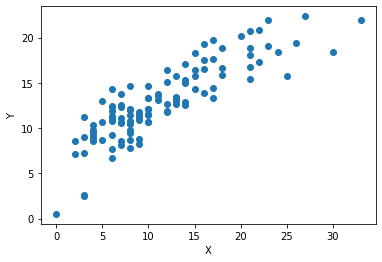

In [0]:
# Part(a)
# This plot is curved shape. that means nonlinearliy relation.
# we need to transform X. Because Y will affect the distribution of error terms.
plt.scatter(df['X'], df['Y'])
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

In [0]:
X = df['X']
y = df['Y']

results_original = smf.ols('y ~ X', data = df).fit()

# Part(e)
# regression function in the original units : Y = 6.863487 + 0.533275X
results_original.params

Intercept    6.863487
X            0.533275
dtype: float64

In [0]:
# Part(b)
# transformation X_tr = route(X)

X_tr = df['X']**(1/2)
df['X'] = X_tr

In [0]:
df.head()

,Y,X
0,14.28,3.872983
1,8.80,3.000000
2,12.49,2.645751
3,9.38,2.000000
4,10.89,3.000000


In [0]:
X = df['X']
y = df['Y']

results = smf.ols('y ~ X', data = df).fit()

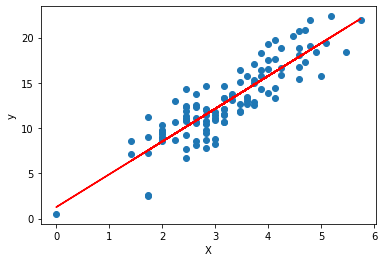

In [0]:
# Part(c)
# regression line appear to be a good fit to the transformed data.

y_hat = results.fittedvalues
plt.scatter(X, y)
plt.plot(X, y_hat, color = 'red')
plt.xlabel('X')
plt.ylabel('y')
plt.show()

In [0]:
results_residual = results.resid

# Part(b)
# linear regression fuction for the transformed data : Y = 1.254697 + 3.623520X
results.params

Intercept    1.254697
X            3.623520
dtype: float64

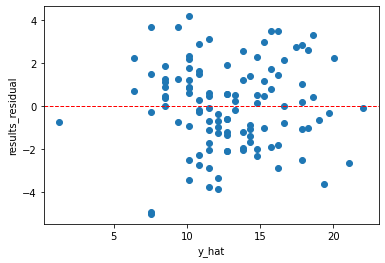

In [0]:
# Part(d)
# according to residual plot, there is no departure from regression line. 
# Also, a normal probability plot show the sample is normally distributed.

plt.scatter(y_hat, results_residual)
plt.axhline(y = 0, color = 'red', linestyle = '--', linewidth = 1)
plt.xlabel('y_hat')
plt.ylabel('results_residual')
plt.show()

((array([-2.4991197 , -2.1672479 , -1.97582218, -1.83751514, -1.72741673,
         -1.63498682, -1.55472837, -1.48339408, -1.41889818, -1.35981755,
         -1.30513574, -1.25410018, -1.20613729, -1.16079931, -1.11772963,
         -1.07663928, -1.03729067, -0.99948588, -0.96305815, -0.92786557,
         -0.89378625, -0.86071463, -0.82855865, -0.79723742, -0.76667945,
         -0.7368212 , -0.70760586, -0.6789824 , -0.65090474, -0.62333113,
         -0.59622353, -0.56954717, -0.54327012, -0.51736298, -0.49179855,
         -0.4665516 , -0.44159861, -0.41691764, -0.39248808, -0.36829057,
         -0.34430684, -0.32051956, -0.29691229, -0.27346937, -0.2501758 ,
         -0.22701721, -0.20397975, -0.18105005, -0.15821517, -0.13546249,
         -0.11277974, -0.09015487, -0.06757607, -0.04503166, -0.02251012,
          0.        ,  0.02251012,  0.04503166,  0.06757607,  0.09015487,
          0.11277974,  0.13546249,  0.15821517,  0.18105005,  0.20397975,
          0.22701721,  0.2501758 ,  0.

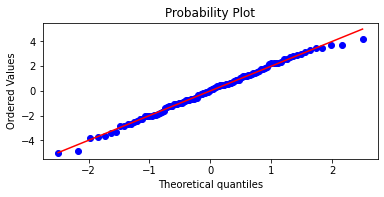

In [0]:
fig, ax = plt.subplots(figsize=(6,2.5))
stats.probplot(results_residual, dist='norm', plot=ax, fit=True)